In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("tips (data for regression problem).csv")
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
data.shape

(244, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
x=data.drop(columns=["tip"])
y=data.tip

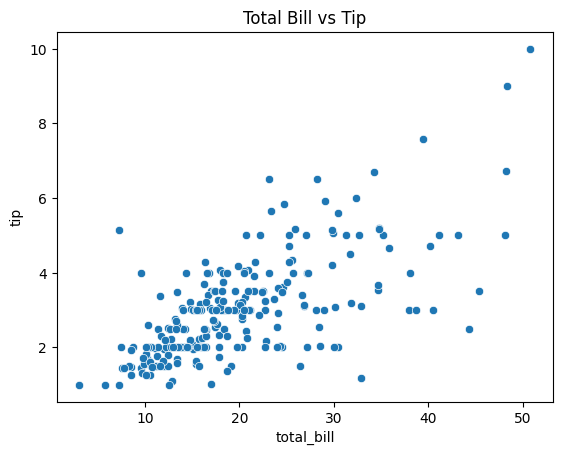

In [8]:
sns.scatterplot(x='total_bill', y='tip', data=data)
plt.title('Total Bill vs Tip')
plt.show()

<Axes: xlabel='day', ylabel='tip'>

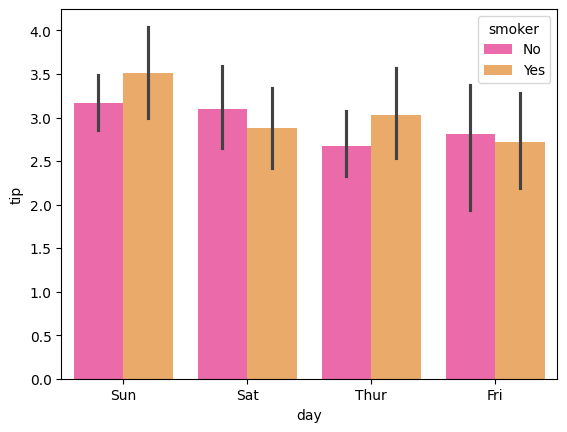

In [9]:
sns.barplot(data=data,x="day",y="tip",palette="spring",hue="smoker")

<Axes: xlabel='day', ylabel='tip'>

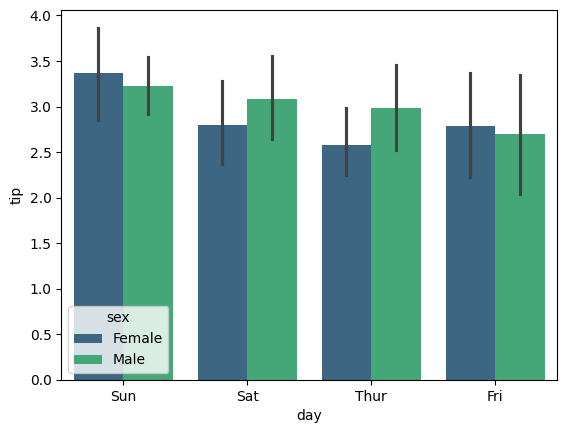

In [10]:
sns.barplot(data=data,x="day",y="tip",palette="viridis",hue="sex")

<Axes: xlabel='day', ylabel='tip'>

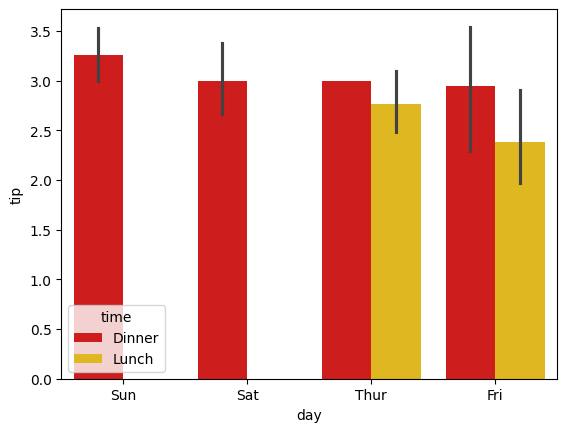

In [11]:
sns.barplot(data=data,x="day",y="tip",palette="hot",hue="time")

<Axes: xlabel='total_bill', ylabel='tip'>

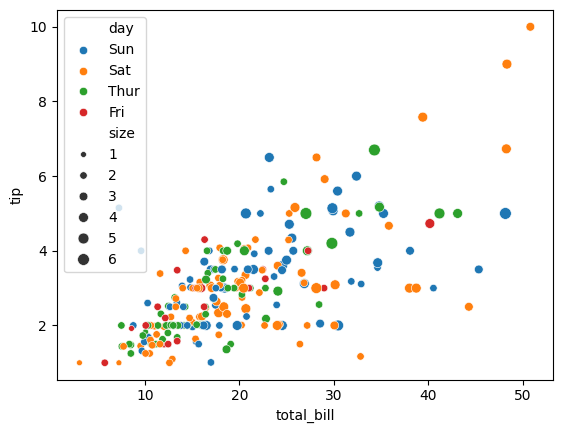

In [12]:
sns.scatterplot(data=data,x="total_bill",y="tip",hue="day",size="size")

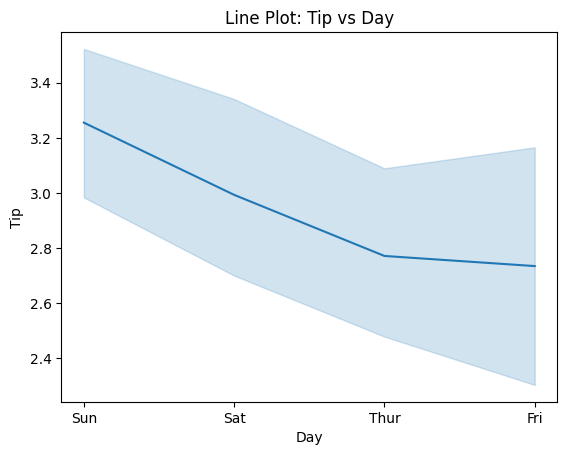

In [13]:
sns.lineplot(x=data['day'], y=data['tip'])
plt.title('Line Plot: Tip vs Day')
plt.xlabel('Day')
plt.ylabel('Tip')
plt.show()

<Axes: xlabel='smoker', ylabel='tip'>

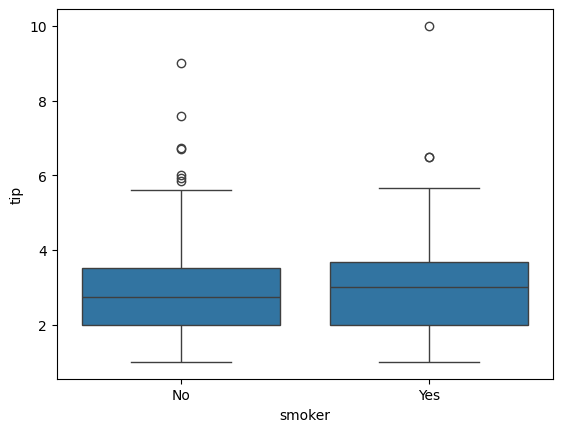

In [14]:
sns.boxplot(data=data,x="smoker",y="tip")

<Axes: xlabel='sex', ylabel='tip'>

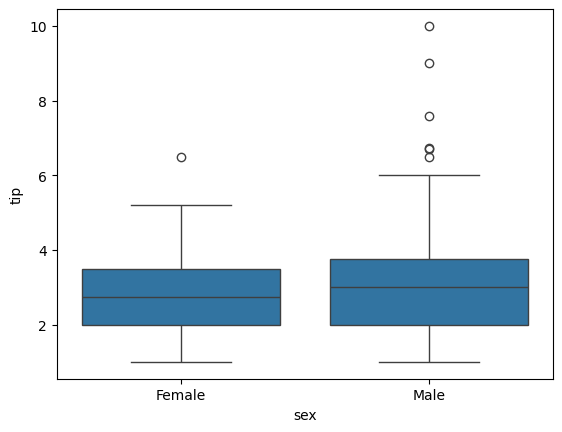

In [15]:
sns.boxplot(data=data,x="sex",y="tip")

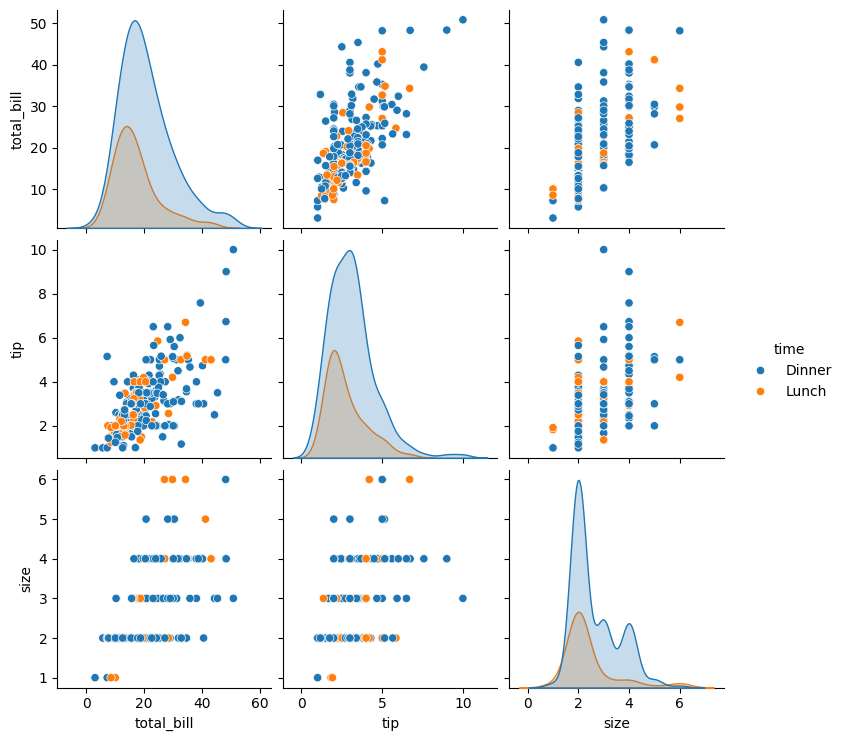

In [16]:
sns.pairplot(data[['total_bill', 'tip', 'size', 'time']], hue='time')
plt.show()

<Axes: xlabel='day', ylabel='tip'>

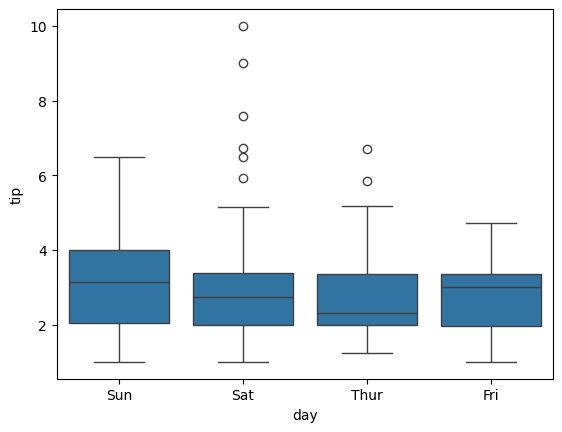

In [17]:
sns.boxplot(data=data,x="day",y="tip")

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x,y,train_size=0.8,random_state=7)

In [19]:
x["sex"].unique()

array(['Female', 'Male'], dtype=object)

In [20]:
x["smoker"].unique()

array(['No', 'Yes'], dtype=object)

In [21]:
x["time"].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [22]:
x_train = pd.get_dummies(x_train, columns=["sex","smoker","time"],drop_first=True)
x_valid = pd.get_dummies(x_valid, columns=["sex","smoker","time"],drop_first=True)

In [23]:
x_train = x_train.astype({col: 'int' for col in x_train.select_dtypes('bool').columns})
x_valid = x_valid.astype({col: 'int' for col in x_valid.select_dtypes('bool').columns})

In [24]:
x.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_train["day"]=le.fit_transform(x_train["day"])
x_valid["day"] = le.transform(x_valid["day"])

In [26]:
x_train.head()

,total_bill,day,size,sex_Male,smoker_Yes,time_Lunch
66,16.45,1,2,0,0,0
208,24.27,1,2,1,1,0
193,15.48,3,2,1,1,1
77,27.20,3,4,1,0,1
96,27.28,0,2,1,1,0


Model Training

1} Linear Regression

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
linear = LinearRegression()
linear.fit(x_train, y_train)
ypred_linear = linear.predict(x_valid)
mse_linear = mean_squared_error(y_valid, ypred_linear)
r2_linear = r2_score(y_valid, ypred_linear)
print("mse for linear regression = ",mse_linear)
print("r2 for linear regression = ",r2_linear)

mse for linear regression =  0.8877758961150215
r2 for linear regression =  0.48253122496539935


2} Lasso Regularization

In [28]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(x_train, y_train)
y_pred_lasso = lasso_model.predict(x_valid)
mse_lasso = mean_squared_error(y_valid, y_pred_lasso)
r2_lasso = r2_score(y_valid, y_pred_lasso)
print("mse for lasso = ",mse_lasso)
print("r2 for lasso = ",r2_lasso)

mse for lasso =  0.8897031007429531
r2 for lasso =  0.4814078916755219


3} Ridge Regularization

In [29]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
y_pred_ridge = ridge_model.predict(x_valid)
mse_ridge = mean_squared_error(y_valid, y_pred_ridge)
r2_ridge = r2_score(y_valid, y_pred_ridge)
print("mse for ridge = ",mse_ridge)
print("r2 for ridge = ",r2_ridge)

mse for ridge =  0.8876220936497872
r2 for ridge =  0.48262087368601725


4} Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(x_train, y_train)
y_pred_dectree = tree_model.predict(x_valid)
mse_dectree = mean_squared_error(y_valid, y_pred_dectree)
r2_dectree = r2_score(y_valid, y_pred_dectree)
print("mse for decision tree = ",mse_dectree)
print("r2 for decision tree = ",r2_dectree)

mse for decision tree =  0.81484113883199
r2 for decision tree =  0.5250435973713814


5} Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_valid)
mse_rf = mean_squared_error(y_valid, y_pred_rf)
r2_rf = r2_score(y_valid, y_pred_rf)
print("mse for random forest = ",mse_rf)
print("r2 for random forest = ",r2_rf)

mse for random forest =  0.678898752364078
r2 for random forest =  0.6042819958328288


6} Support Vector Regression (SVR)

In [32]:
from sklearn.svm import SVR
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_model.fit(x_train, y_train)
y_pred_svr = svr_model.predict(x_valid)
mse_svr = mean_squared_error(y_valid, y_pred_svr)
r2_svr = r2_score(y_valid, y_pred_svr)
print("mse for SVR = ",mse_svr)
print("r2 for SVR = ",r2_svr)

mse for SVR =  0.890718194009642
r2 for SVR =  0.48081621187033896


7} KNN

In [33]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(x_train, y_train)
y_pred_knn = knn_model.predict(x_train)
mse_knn = mean_squared_error(y_train, y_pred_knn)
r2_knn = r2_score(y_train, y_pred_knn)
print("mse for KNN = ",mse_knn)
print("r2 for KNN = ",r2_knn)

mse for KNN =  0.9745640615384616
r2 for KNN =  0.5005348551688764


Comparison :

In [34]:
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 
              'Random Forest', 'SVR', 'KNN'],
    'MSE': [mean_squared_error(y_valid, ypred_linear),
            mean_squared_error(y_valid, y_pred_lasso),
            mean_squared_error(y_valid, y_pred_ridge),
            mean_squared_error(y_valid, y_pred_dectree),
            mean_squared_error(y_valid, y_pred_rf),
            mean_squared_error(y_valid, y_pred_svr),
            mean_squared_error(y_train, y_pred_knn)],
    'R²': [r2_score(y_valid, ypred_linear),
           r2_score(y_valid, y_pred_lasso),
           r2_score(y_valid, y_pred_ridge),
           r2_score(y_valid, y_pred_dectree),
           r2_score(y_valid, y_pred_rf),
           r2_score(y_valid, y_pred_svr),
           r2_score(y_train, y_pred_knn)]
}

results_data = pd.DataFrame(results)
print(results_data.sort_values(by='R²', ascending=False))

               Model       MSE        R²
4      Random Forest  0.678899  0.604282
3      Decision Tree  0.814841  0.525044
6                KNN  0.974564  0.500535
2   Lasso Regression  0.887622  0.482621
0  Linear Regression  0.887776  0.482531
1   Ridge Regression  0.889703  0.481408
5                SVR  0.890718  0.480816


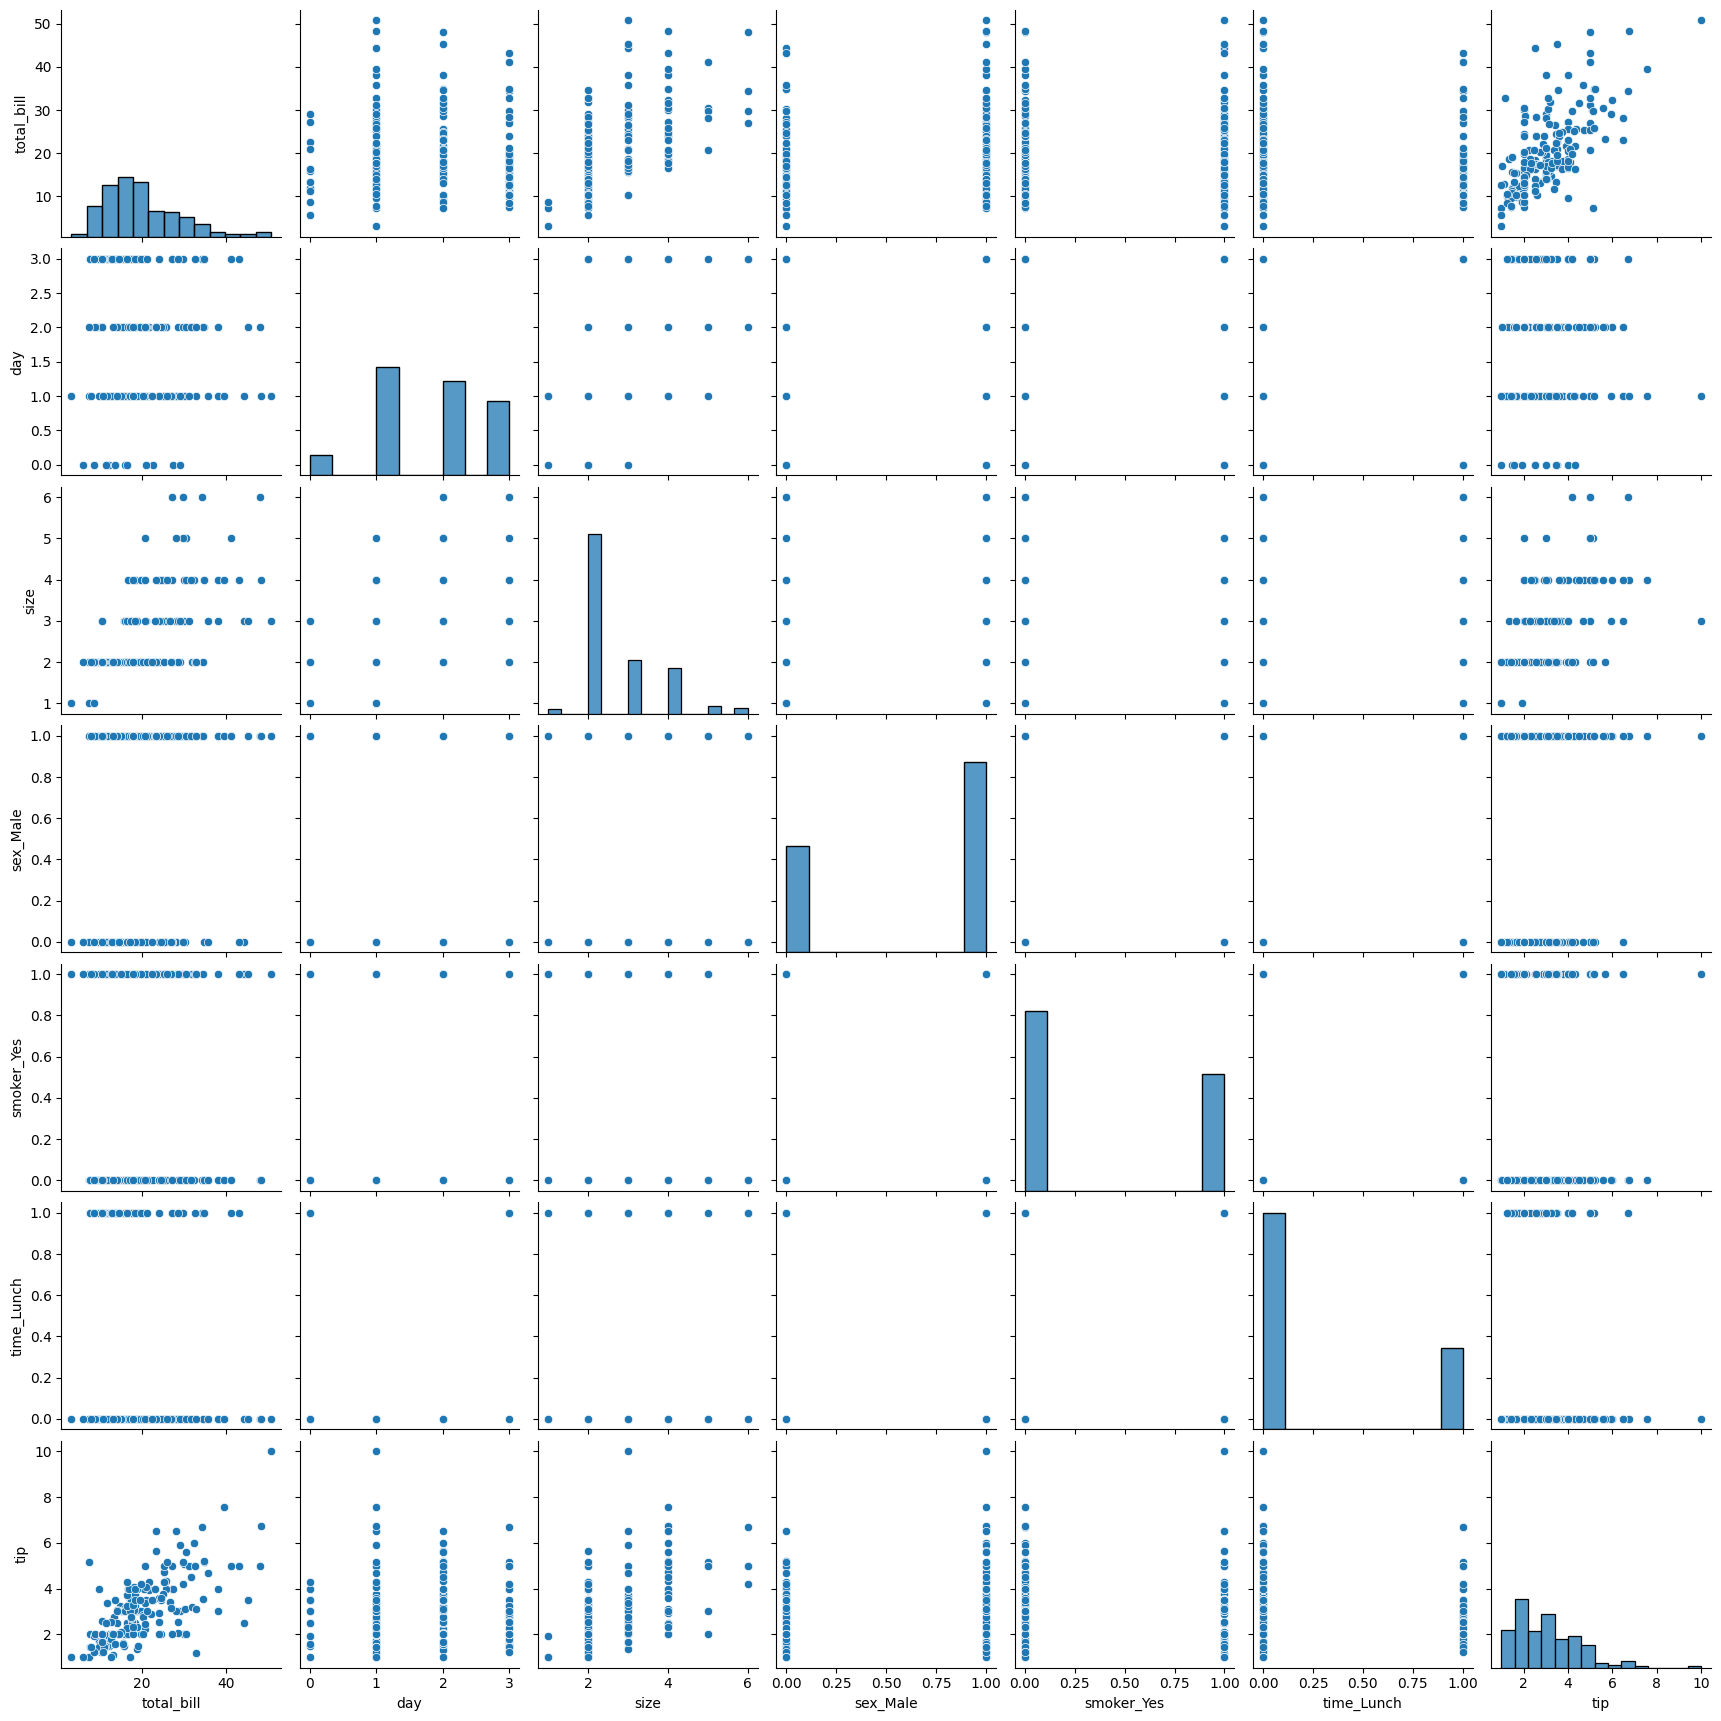

In [35]:
import seaborn as sns
# Concatenate x_train and y_trainfor pair plot
train_data = x_train.copy()
train_data['tip'] = y_train
sns.pairplot(train_data)
plt.show()

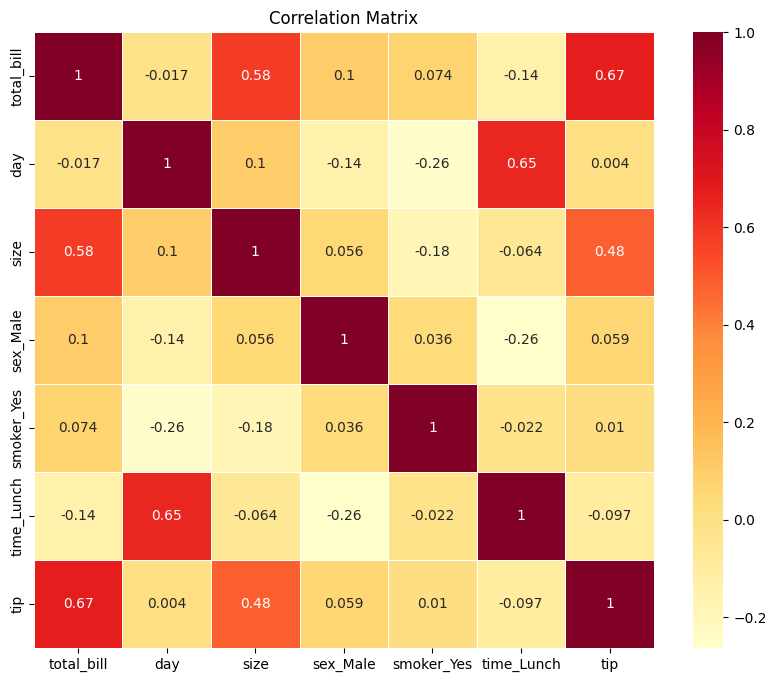

In [36]:
plt.figure(figsize=(10, 8))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='YlOrRd', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

Rainbow Test

In [37]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow
x_train_const = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_const).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f'Stats of Rainbow Test: {rainbow_stat}, p-value: {rainbow_p_value}')
if rainbow_p_value > 0.05:
    print("No evidence found against linearity (p-value > 0.05). It may follow a linear trend")
else:
    print("Evidence against linearity (p-value <= 0.05). The data may not follow a linear trend.")

Stats of Rainbow Test: 0.9218499487414654, p-value: 0.6540103310426213
No evidence found against linearity (p-value > 0.05). It may follow a linear trend


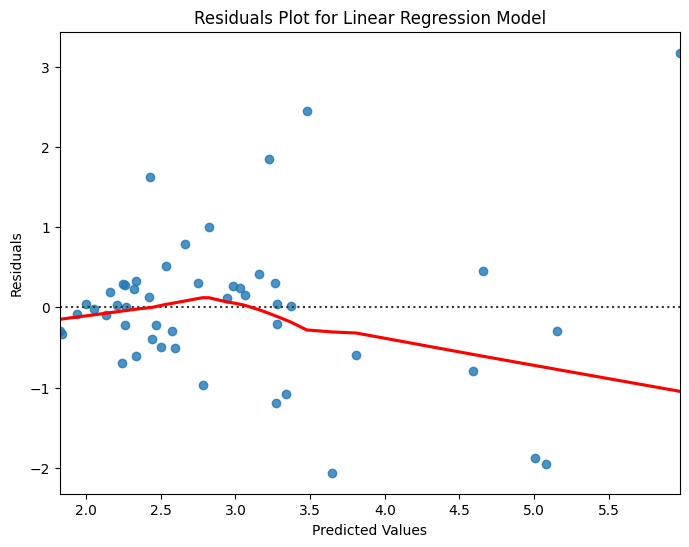

In [38]:
residuals = y_valid - y_pred_lasso
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_lasso, y=residuals, lowess=True, line_kws={"color": "red"})
plt.title("Residuals Plot for Linear Regression Model")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.show()

Key Insights on Factors Influencing Tip Amounts :

-Tips tend to increase with the total bill amount, as people commonly tip based on a percentage of their bill. Higher spending results in larger tips.

-Tips are generally higher at dinner than at lunch. This difference could be because dinner bills are typically larger, leading to higher tip amounts.

-Tips tend to peak on weekends compared to weekdays. This pattern may reflect higher spending and dining out frequency on weekends.